In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/senators analysis/namayandeh.xlsx'
df1 = pd.read_excel(file_path)

In [4]:
df1

,id,name,link_ax,tavalod,mahal_tavalod,tasalot_bar_zaban,savagegh_tahsilat,doreha,sal_semat,ozviat_comision,howzeh,tarh_emza_shedeh,link_tarh_emza_shodeh,tarikh_tarh,ham_howzeh
0,https://rc.majlis.ir/fa/parliament_member/show...,علی آذری,https://rc.majlis.ir/rc-assets/pm/980193222.az...,NaN,NaN,NaN,"<div class=""flex-grow-1"">\n ...",\n ...,\n ...,"کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران",خراسان رضوی (فاروج / قوچان),طرح شفافیت قوای سه گانه و دستگاه های اجرایی و ...,https://rc.majlis.ir/fa/legal_draft/show/17429...,"1401/01/23,1400/09/29,1400/06/12,1399/07/09,14...","علی آذری,اکبر احمدپور,احسان ارکانی,فاطمه ر..."
1,https://rc.majlis.ir/fa/parliament_member/show...,الهام آزاد,https://rc.majlis.ir/rc-assets/pm/0baba57d0df3...,NaN,NaN,NaN,"<div class=""flex-grow-1"">\n ...",\n ...,\n ...,"کمیسیون اصل نودم قانون اساسی مجلس , کمیسیون ا...",اصفهان (نائین),طرح شفافیت قوای سه گانه و دستگاه های اجرایی و ...,https://rc.majlis.ir/fa/legal_draft/show/17429...,"1401/01/23,1400/10/22,1400/08/26,1400/08/26,14...","الهام آزاد,ابوالفضل ابوترابی,امیرحسین بانکی ..."
2,https://rc.majlis.ir/fa/parliament_member/show...,یحیی ابراهیمی,https://rc.majlis.ir/rc-assets/pm/8ec8f524f033...,NaN,NaN,NaN,"<div class=""flex-grow-1"">\n ...",\n ...,\n ...,"کمیسیون بهداشت و درمان , کمیسیون بهداشت و درمان",لرستان (دلفان / سلسله),طرح الحاق ماده ( ۸۴ مکرر) به قانون آیین دادرسی...,https://rc.majlis.ir/fa/legal_draft/show/17427...,"1400/10/08,1400/08/23,1400/11/09,1399/11/19,14...","یحیی ابراهیمی,محمدرضا مبلغی,مرتضی محمودوند,..."
3,https://rc.majlis.ir/fa/parliament_member/show...,مصطفی آقامیرسلیم,https://rc.majlis.ir/rc-assets/pm/4be90752198f...,NaN,NaN,NaN,"<div class=""flex-grow-1"">\n ...",\n ...,\n ...,"کمیسیون تدوین آیین‌نامه داخلی مجلس , کمیسیون ...",تهران (اسلامشهر / تهران / ری / شمیرانات),الحاق دو بند به قانون فهرست نهادها و موسسات ع...,https://rc.majlis.ir/fa/legal_draft/show/17427...,"1399/10/16,1400/03/09,1400/09/17,1400/09/16,14...","مصطفی آقامیرسلیم,مجتبی توانگر,سید محسن دهنو..."
4,https://rc.majlis.ir/fa/parliament_member/show...,اکبر احمدپور,https://rc.majlis.ir/rc-assets/pm/7abd9d10a651...,NaN,NaN,NaN,"<div class=""flex-grow-1"">\n ...",\n ...,\n ...,"کمیسیون آموزش و تحقیقات, کمیسیون آموزش و تحقی...",خراسان رضوی (خواف / رشتخوار),طرح الحاق یک تبصره به ماده ( ۶) قانون حمایت از...,https://rc.majlis.ir/fa/legal_draft/show/16805...,"1399/11/19,1400/08/26,1400/08/26,1399/09/26,13...","علی آذری,اکبر احمدپور,احسان ارکانی,فاطمه ر..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,https://rc.majlis.ir/fa/parliament_member/show...,موسی غضنفرآبادی,https://rc.majlis.ir/rc-assets/pm/1437531419.U...,1345.0,بم,\n ...,"<div class=""flex-grow-1"">\n ...",\n ...,\n ...,"کمیسیون قضایی و حقوقی , کمیسیون تدوین آیین‌نا...",کرمان (بم),طرح شفافیت قوای سه گانه و دستگاه های اجرایی و ...,https://rc.majlis.ir/fa/legal_draft/show/17429...,"1401/01/23,1400/11/09,1400/09/14,1400/09/22,14...","صمد اله محمدی,ذبیح اله اعظمی ساردویی,حسین ج..."
4028,https://rc.majlis.ir/fa/parliament_member/show...,مهدی عیسی زاده,https://rc.majlis.ir/rc-assets/pm/1042635935.U...,1341.0,احمدعلی,NaN,"<div class=""flex-grow-1"">\n ...",\n ...,\n ...,"کمیسیون اجتماعی , کمیسیون اجتماعی , کمیسیون ت...",آذربایجان غربی (میاندوآب),طرح شفافیت قوای سه گانه و دستگاه های اجرایی و ...,https://rc.majlis.ir/fa/legal_draft/show/17429...,"1401/01/23,1400/07/23,1400/08/26,1399/09/23,13...","یعقوب رضازاده,وحید جلال زاده,انور حبیب زاده ..."
4029,https://rc.majlis.ir/fa/parliament_member/show...,رسول فرخی میکال,https://rc.majlis.ir/rc-assets/pm/1688689121.f...,NaN,NaN,NaN,"<div class=""flex-grow-1"">\n ...",\n ...,\n ...,"کمیسیون امور داخلی کشور و شوراها, کمیسیون امو...",گیلان (لاهیجان),طرح شفافیت قوای سه گانه و دستگاه های اجرایی و ...,https://rc.majlis.ir/fa/legal_draft/show/17429...,"1401/01/23,1399/10/16,1400/11/09,1400/03/09,13...","احمد دنیامالی,غلامرضا مرحبا,مهرداد گودرزوند..."
4030,https://rc.majlis.ir/fa/parliament_member/show...,ابوالفضل عمویی,https://rc.majlis.ir/rc-assets/pm/c99de5587e89.

data processing

In [ ]:
df1.isnull

In [6]:
df=df1[['name', 'ozviat_comision']]
df

,name,ozviat_comision
0,علی آذری,"کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران"
1,الهام آزاد,"کمیسیون اصل نودم قانون اساسی مجلس , کمیسیون ا..."
2,یحیی ابراهیمی,"کمیسیون بهداشت و درمان , کمیسیون بهداشت و درمان"
3,مصطفی آقامیرسلیم,"کمیسیون تدوین آیین‌نامه داخلی مجلس , کمیسیون ..."
4,اکبر احمدپور,"کمیسیون آموزش و تحقیقات, کمیسیون آموزش و تحقی..."
...,...,...
4027,موسی غضنفرآبادی,"کمیسیون قضایی و حقوقی , کمیسیون تدوین آیین‌نا..."
4028,مهدی عیسی زاده,"کمیسیون اجتماعی , کمیسیون اجتماعی , کمیسیون ت..."
4029,رسول فرخی میکال,"کمیسیون امور داخلی کشور و شوراها, کمیسیون امو..."
4030,ابوالفضل عمویی,"کمیسیون امنیت ملی و سیاست خارجی, کمیسیون تدوی..."


In [7]:
df=df.dropna().reset_index()
df

,index,name,ozviat_comision
0,0,علی آذری,"کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران"
1,1,الهام آزاد,"کمیسیون اصل نودم قانون اساسی مجلس , کمیسیون ا..."
2,2,یحیی ابراهیمی,"کمیسیون بهداشت و درمان , کمیسیون بهداشت و درمان"
3,3,مصطفی آقامیرسلیم,"کمیسیون تدوین آیین‌نامه داخلی مجلس , کمیسیون ..."
4,4,اکبر احمدپور,"کمیسیون آموزش و تحقیقات, کمیسیون آموزش و تحقی..."
...,...,...,...
216,4027,موسی غضنفرآبادی,"کمیسیون قضایی و حقوقی , کمیسیون تدوین آیین‌نا..."
217,4028,مهدی عیسی زاده,"کمیسیون اجتماعی , کمیسیون اجتماعی , کمیسیون ت..."
218,4029,رسول فرخی میکال,"کمیسیون امور داخلی کشور و شوراها, کمیسیون امو..."
219,4030,ابوالفضل عمویی,"کمیسیون امنیت ملی و سیاست خارجی, کمیسیون تدوی..."


add graph nodes and edges

In [8]:
G2=nx.Graph()

In [9]:
df['ozviat_comision']

0            کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران
1       کمیسیون اصل نودم قانون اساسی مجلس , کمیسیون ا...
2       کمیسیون بهداشت و درمان , کمیسیون بهداشت و درمان 
3       کمیسیون تدوین آیین‌نامه داخلی مجلس , کمیسیون ...
4       کمیسیون آموزش و تحقیقات, کمیسیون آموزش و تحقی...
                             ...                        
216     کمیسیون قضایی و حقوقی , کمیسیون تدوین آیین‌نا...
217     کمیسیون اجتماعی , کمیسیون اجتماعی , کمیسیون ت...
218     کمیسیون امور داخلی کشور و شوراها, کمیسیون امو...
219     کمیسیون امنیت ملی و سیاست خارجی, کمیسیون تدوی...
220     کمیسیون صنایع و معادن , کمیسیون تلفیق, کمیسیو...
Name: ozviat_comision, Length: 221, dtype: object

In [ ]:
senators=tuple(df['name'])
senators

In [42]:

comissions=set()
for comission in df['ozviat_comision']:
  com=str(comission).split(',')
  comissions.update(com)

len(comissions)


18

In [11]:
from networkx.algorithms import bipartite
G2.add_nodes_from(senators , bipartite=0)


In [12]:
print(G2)

Graph with 221 nodes and 0 edges


In [43]:

for _, row in df.iterrows():
        representatives = row['name']
        comissions=str(row['ozviat_comision']).split(',')

        for comission in comissions:
              G2.add_edge(representatives, comission)

In [44]:
len(comissions)


4

In [14]:
G2.add_nodes_from(comissions , bipartite=1)


In [15]:
len(senators)

221

In [17]:
print(G2)

Graph with 239 nodes and 324 edges


In [ ]:
for edge in G2.edges:
  print(edge)

In [186]:
print(G2)

Graph with 239 nodes and 3978 edges


visualization

In [19]:
pos=nx.bipartite_layout(G2 , senators)

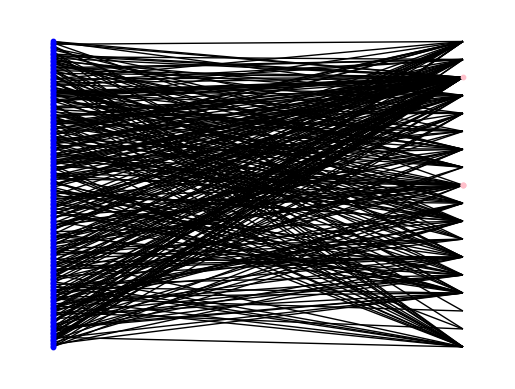

In [20]:
nx.draw_networkx_nodes(G2 , pos, nodelist=senators, node_color='blue', node_size=10 )
nx.draw_networkx_nodes(G2 , pos, nodelist=comissions, node_color='pink' , node_size=10)

nx.draw_networkx_edges(G2 , pos)

#label_pos = {k:(v[0], v[1]+0.05) for k,v in pos.items()}
#nx.draw_networkx_labels(G2, label_pos, font_size=5, font_weight='bold', font_color='k')

plt.axis('off')
plt.show()

In [21]:
nx.write_graphml(G2,'senators-comission.graphml')

one partite graph

In [22]:
one_partite_graph=nx.bipartite.projected_graph(G2 , senators)

<ipython-input-23-08557197835c>:3: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(one_partite_graph , pos, arrowsize=5)


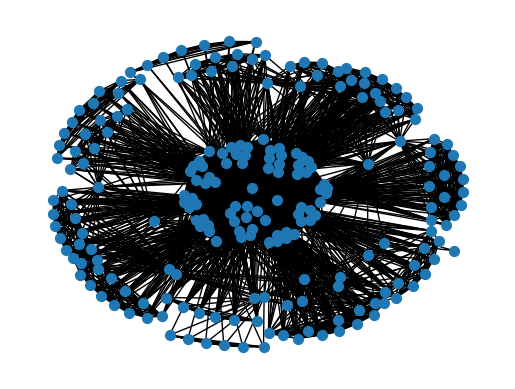

In [23]:
pos=nx.kamada_kawai_layout(one_partite_graph)
nx.draw_networkx_nodes(one_partite_graph , pos , node_size=50)
nx.draw_networkx_edges(one_partite_graph , pos, arrowsize=5)
plt.axis('off')
plt.show()

In [24]:
nx.write_graphml(one_partite_graph,'senators-comission-onepartite.graphml')

greedy modularity

In [25]:
from networkx.algorithms import community

communities = list(community.greedy_modularity_communities(one_partite_graph))
num_communities = len(communities)
print("Number of Communities:", num_communities)

for i, community_nodes in enumerate(communities):
    print(f"Community {i + 1}: {list(community_nodes)}")


Number of Communities: 10
Community 1: ['مهرداد  گودرزوند چگینی', 'رضا تقی پور انوری', 'رجب رحمانی', 'کمال علیپور خنکداری', 'سید شمس الدین  حسینی', 'اقبال  شاکری', 'عیسی جعفری', 'رحیم زارع', 'آرا  شاوردیان', 'احمد  دنیامالی', 'علیرضا  شهبازی', 'علی اکبر  کریمی', 'مجتبی  یوسفی', 'غلامرضا  شریعتی اندراتی', 'محسن  زنگنه', 'جعفر قادری', 'محمد  رشیدی', 'احسان  ارکانی', 'بهروز  محبی نجم آبادی', 'کمال  حسین پور', 'اسماعیل  حسین زهی', 'آرش  زره تن لهونی', 'علی  آذری', 'سید البرز  حسینی', 'مجتبی  رضاخواه', 'محمد  سرگزی', 'منصور آرامی', 'رجب رحمنی', 'حمید رضا حاجی بابایی', 'دکتر علی اصغر  خانی', 'صدیف بدری', 'شارلی  انویه تکیه', 'محمدرضا  دشتی اردکانی', 'رحمت اله  فیروزی پوربادی', 'ولی اله  فرزانه', 'عبدالجلال ایری', 'احمد جباری', 'محمدرضا رضایی کوچی', 'حسین علی حاجی دلیگانی', 'محمد خدابخشی']
Community 2: ['قدرت اله  حمزه شلمزاری', 'حسین محمد  صالحی دارانی', 'محمود احمدی بیغش', 'رسول  فرخی میکال', 'علی  علیزاده', 'حسین  عباس زاده', 'محمدحسن آصفری', 'محمدصالح جوکار', 'روح الله حضرت پور طلاتپه', '

In [26]:
from networkx.algorithms.community.louvain import modularity
greedy_modularity=modularity(one_partite_graph ,communities )
greedy_modularity

0.30138752028003857

girvan_newman

In [27]:
from networkx.algorithms import community

gn_communities = list(community.girvan_newman(one_partite_graph))
num_communities = len(gn_communities)
print("Number of Communities:", num_communities)

KeyboardInterrupt: ignored

louvain communities

In [36]:
from networkx.algorithms import community

louvain_communities = list(community.louvain_communities(one_partite_graph))
num_communities = len(louvain_communities)
print("Number of Communities:", num_communities)

Number of Communities: 11


In [37]:
for i, community_nodes in enumerate(louvain_communities):
    print(f"Community {i + 1}: {list(community_nodes)}")

Community 1: ['سید البرز  حسینی', 'کمال علیپور خنکداری', 'محمد  سرگزی', 'اقبال  شاکری', 'منصور آرامی', 'آرا  شاوردیان', 'احمد  دنیامالی', 'دکتر علی اصغر  خانی', 'مجتبی  یوسفی', 'غلامرضا  شریعتی اندراتی', 'صدیف بدری', 'شارلی  انویه تکیه', 'رحمت اله  فیروزی پوربادی', 'عبدالجلال ایری', 'کمال  حسین پور', 'احمد جباری', 'اسماعیل  حسین زهی', 'محمدرضا رضایی کوچی', 'حمزه  امینی', 'علی  آذری']
Community 2: ['علیرضا زاکانی', 'فاطمه  محمدبیگی', 'پروین  صالحی مبارکه', 'ملک  فاضلی', 'عبدالحسین  روح الامینی', 'حسن رزمیان مقدم', 'سید مرتضی  خاتمی', 'سید مسعود  خاتمی', 'رضا  آریان پور', 'حسینعلی  شهریاری', 'علی  خضریان', 'یحیی  ابراهیمی', 'مصطفی  آقامیرسلیم', 'محمدعلی  محسنی بند پی', 'سید ناصر  حسینی پور', 'همایون  سامه یح نجف آبادی', 'سید محمّد  پاک مهر', 'حسینعلی شهریاری', 'محسن  فتحی', ' سید نظام الدین  موسوی', 'حسن  شجاعی علی آبادی', 'غلامحسین  رضوانی', 'زهرا  شیخی ', 'الهام  آزاد', 'علی اصغر  باقرزاده', 'سید جلیل  میرمحمدی میبدی']
Community 3: ['امان اله  حسین پور', 'سیدصادق طباطبایی نژاد', 'غلامر

In [38]:
from networkx.algorithms.community.louvain import modularity
louvain_modularity=modularity(one_partite_graph ,louvain_communities )
louvain_modularity

0.3285489553493297

label_propagation

In [39]:
lp_communities = list(community.label_propagation_communities(one_partite_graph))

num_communities = len(lp_communities)
print("Number of Communities (Label Propagation):", num_communities)

for i, community_nodes in enumerate(lp_communities):
    print(f"Community {i + 1}: {list(community_nodes)}")

Number of Communities (Label Propagation): 7
Community 1: ['اقبال  شاکری', 'ولی اسماعیلی', 'آرا  شاوردیان', 'غلامرضا  شریعتی اندراتی', 'سید کریم  حسینی', 'حسین حاتمی', 'کمال  حسین پور', 'حسین  گودرزی', 'حسن  لطفی', 'علی  آذری', 'فاطمه  رحمانی', 'سید البرز  حسینی', 'سیدسلمان ذاکر', 'منصور آرامی', 'مهدی  شریفیان', 'شارلی  انویه تکیه', 'علی زنجانی حسنلویی', 'رحمت اله  فیروزی پوربادی', 'عبدالجلال ایری', 'احمد جباری', 'محمدرضا رضایی کوچی', 'حمزه  امینی']
Community 2: ['علیرضا زاکانی', 'سید ناصر  حسینی پور', ' سید نظام الدین  موسوی', 'حسن  شجاعی علی آبادی', 'علی  خضریان', 'الهام  آزاد']
Community 3: ['محمدعلی  محسنی بند پی', 'فاطمه  محمدبیگی', 'همایون  سامه یح نجف آبادی', 'پروین  صالحی مبارکه', 'ملک  فاضلی', 'حسینعلی شهریاری', 'عبدالحسین  روح الامینی', 'محسن  فتحی', 'سید مسعود  خاتمی', 'حسن رزمیان مقدم', 'حسینعلی  شهریاری', 'زهرا  شیخی ', 'یحیی  ابراهیمی']
Community 4: ['رضا تقی پور انوری', 'رجب رحمانی', 'سید محمد  مولوی', 'رسول  فرخی میکال', 'کیومرث  سرمدی واله', 'محمد  وحیدی', 'احمد  دنیام

In [40]:
from networkx.algorithms.community.louvain import modularity
louvain_modularity=modularity(one_partite_graph ,lp_communities )
louvain_modularity

0.13055904217065545